In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing all the necessary libraries**

In [ ]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# **Reading data from the csv file**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML/EastWestAirlines.csv")
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **Shape of the dataset**

In [ ]:
df.shape

(3999, 12)

# **Information of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# **Describing th dataset**

In [ ]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# **Checking null values**

In [ ]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# **Checking Correlation**

In [ ]:
df.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


# **Heatmap**

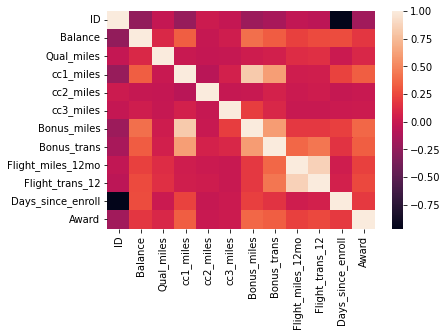

In [ ]:
sns.heatmap(df.corr())
plt.show()

# **StandardScaler**

In [ ]:
df1=df
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_columns =['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
df1[scale_columns] = std_scaler.fit_transform(df[scale_columns])
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# **Task 2**

# Perform Exploratory Data Analysis (EDA) on the
# dataset 

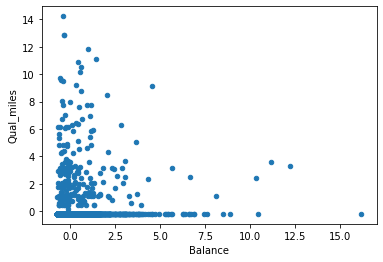

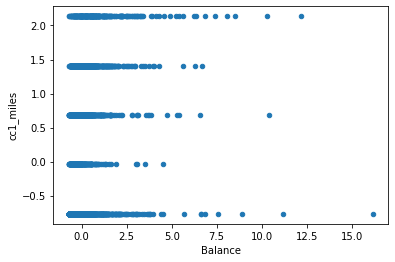

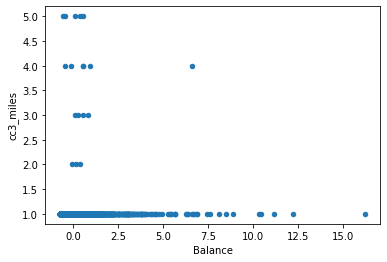

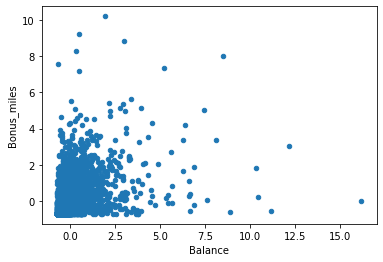

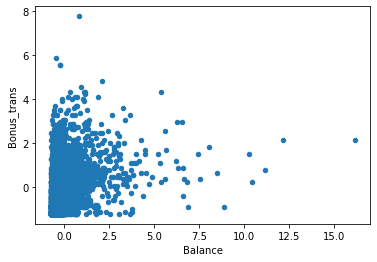

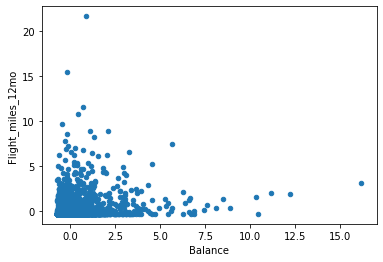

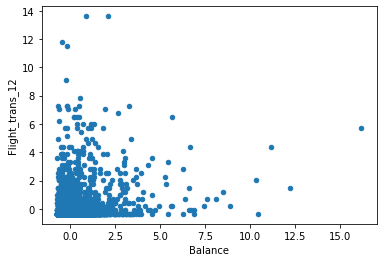

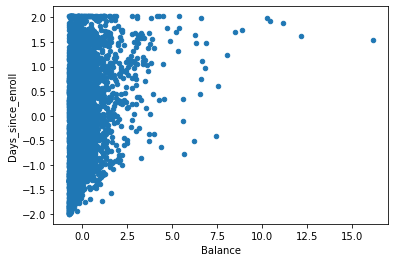

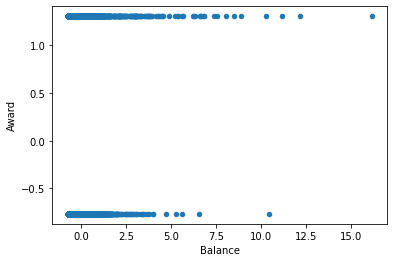

In [ ]:
a=['Qual_miles', 'cc1_miles', 'cc3_miles', 'Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
for b in a:
  df.plot.scatter(x="Balance",y=b)
  plt.show()


# **Task 3**

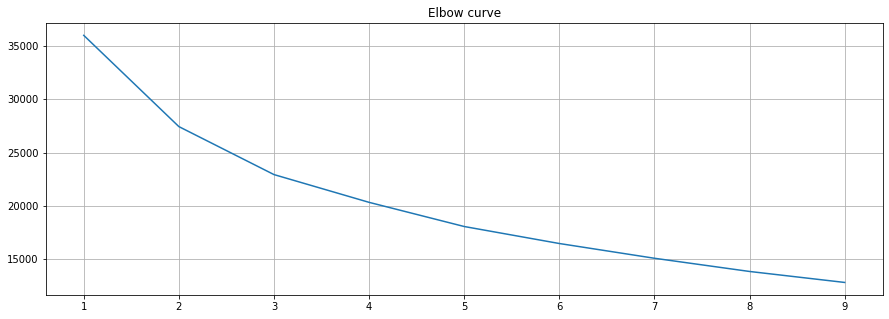

In [ ]:
distorsions = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

# **silhouette score**

For n_clusters = 2 The average silhouette_score is : 0.3363941920693057
For n_clusters = 3 The average silhouette_score is : 0.3233450467665015
For n_clusters = 4 The average silhouette_score is : 0.33282105346834956
For n_clusters = 5 The average silhouette_score is : 0.2813621091829875
For n_clusters = 6 The average silhouette_score is : 0.2744212966192579
For n_clusters = 7 The average silhouette_score is : 0.2467750065106076
For n_clusters = 8 The average silhouette_score is : 0.2571829170657478
For n_clusters = 9 The average silhouette_score is : 0.26335679451649224
For n_clusters = 10 The average silhouette_score is : 0.27002698456158936
For n_clusters = 12 The average silhouette_score is : 0.26922044689846153


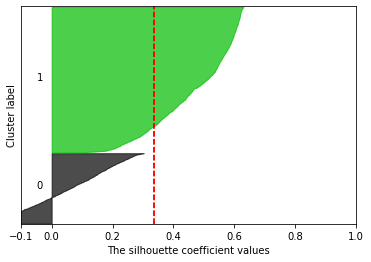

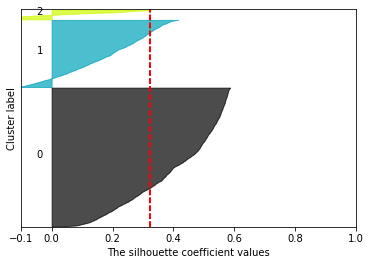

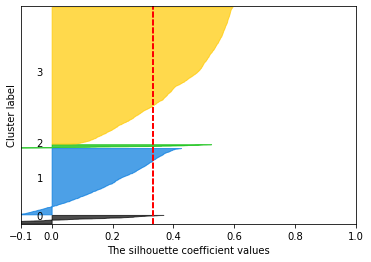

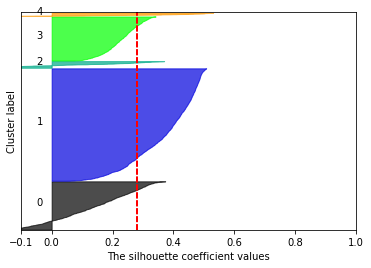

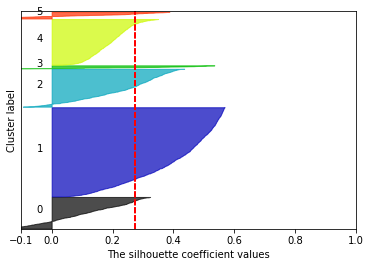

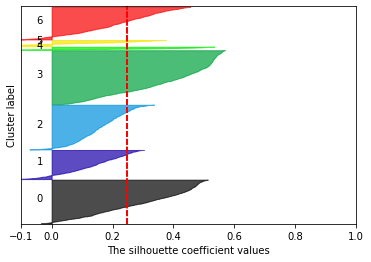

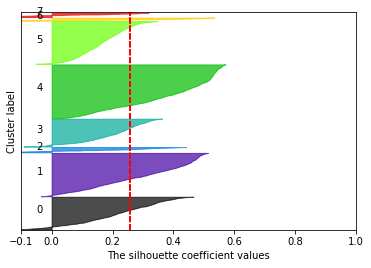

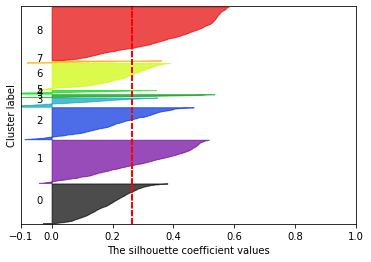

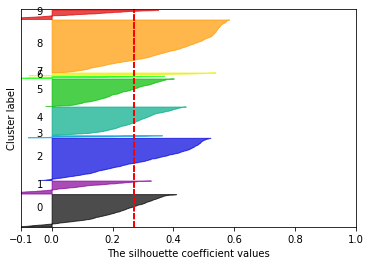

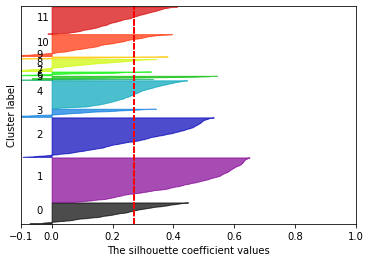

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,12]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
  fig, ax1 = plt.subplots(1, 1)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = df1[scale_columns]
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
print('Attributes used for cluster model: ', scale_columns)

[[ 0.43032766 -0.11574074  1.22758824  0.97105169  0.77432055 -0.08306626
  -0.09443046  0.37159609  0.58501768]
 [-0.29196552 -0.13007252 -0.59631283 -0.50759554 -0.47678693 -0.1880141
  -0.19961088 -0.19507349 -0.3451271 ]
 [ 1.21420409  0.41186869  0.09735521  0.62974905  1.68281235  3.61438829
   3.88198067  0.2922843   0.88975067]
 [ 0.45710365  6.73109194 -0.04322862  0.06371677  0.06535804  0.3596938
   0.39424679 -0.07122344  0.38731797]]
[1 1 1 ... 0 1 1]
Attributes used for cluster model:  ['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award']


In [ ]:
clustered_df = df1[scale_columns]
clustered_df['Balance'] = df1['Balance']
clustered_df['Cluster'] = kmeans.labels_
clustered_df.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,-0.451141,-0.186299,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,6
1,-0.539457,-0.186299,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,6
2,-0.320031,-0.186299,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,6
3,-0.583799,-0.186299,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,6
4,0.239678,-0.186299,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1


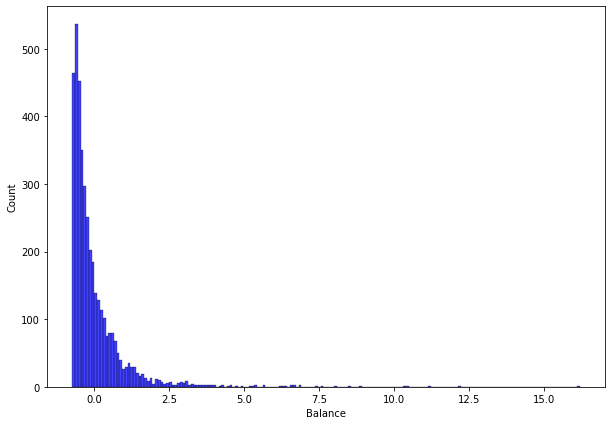

In [ ]:
fig, ax = plt.subplots(figsize = [10,7])
sns.histplot(x = df1["Balance"], color = "b") 
plt.show()

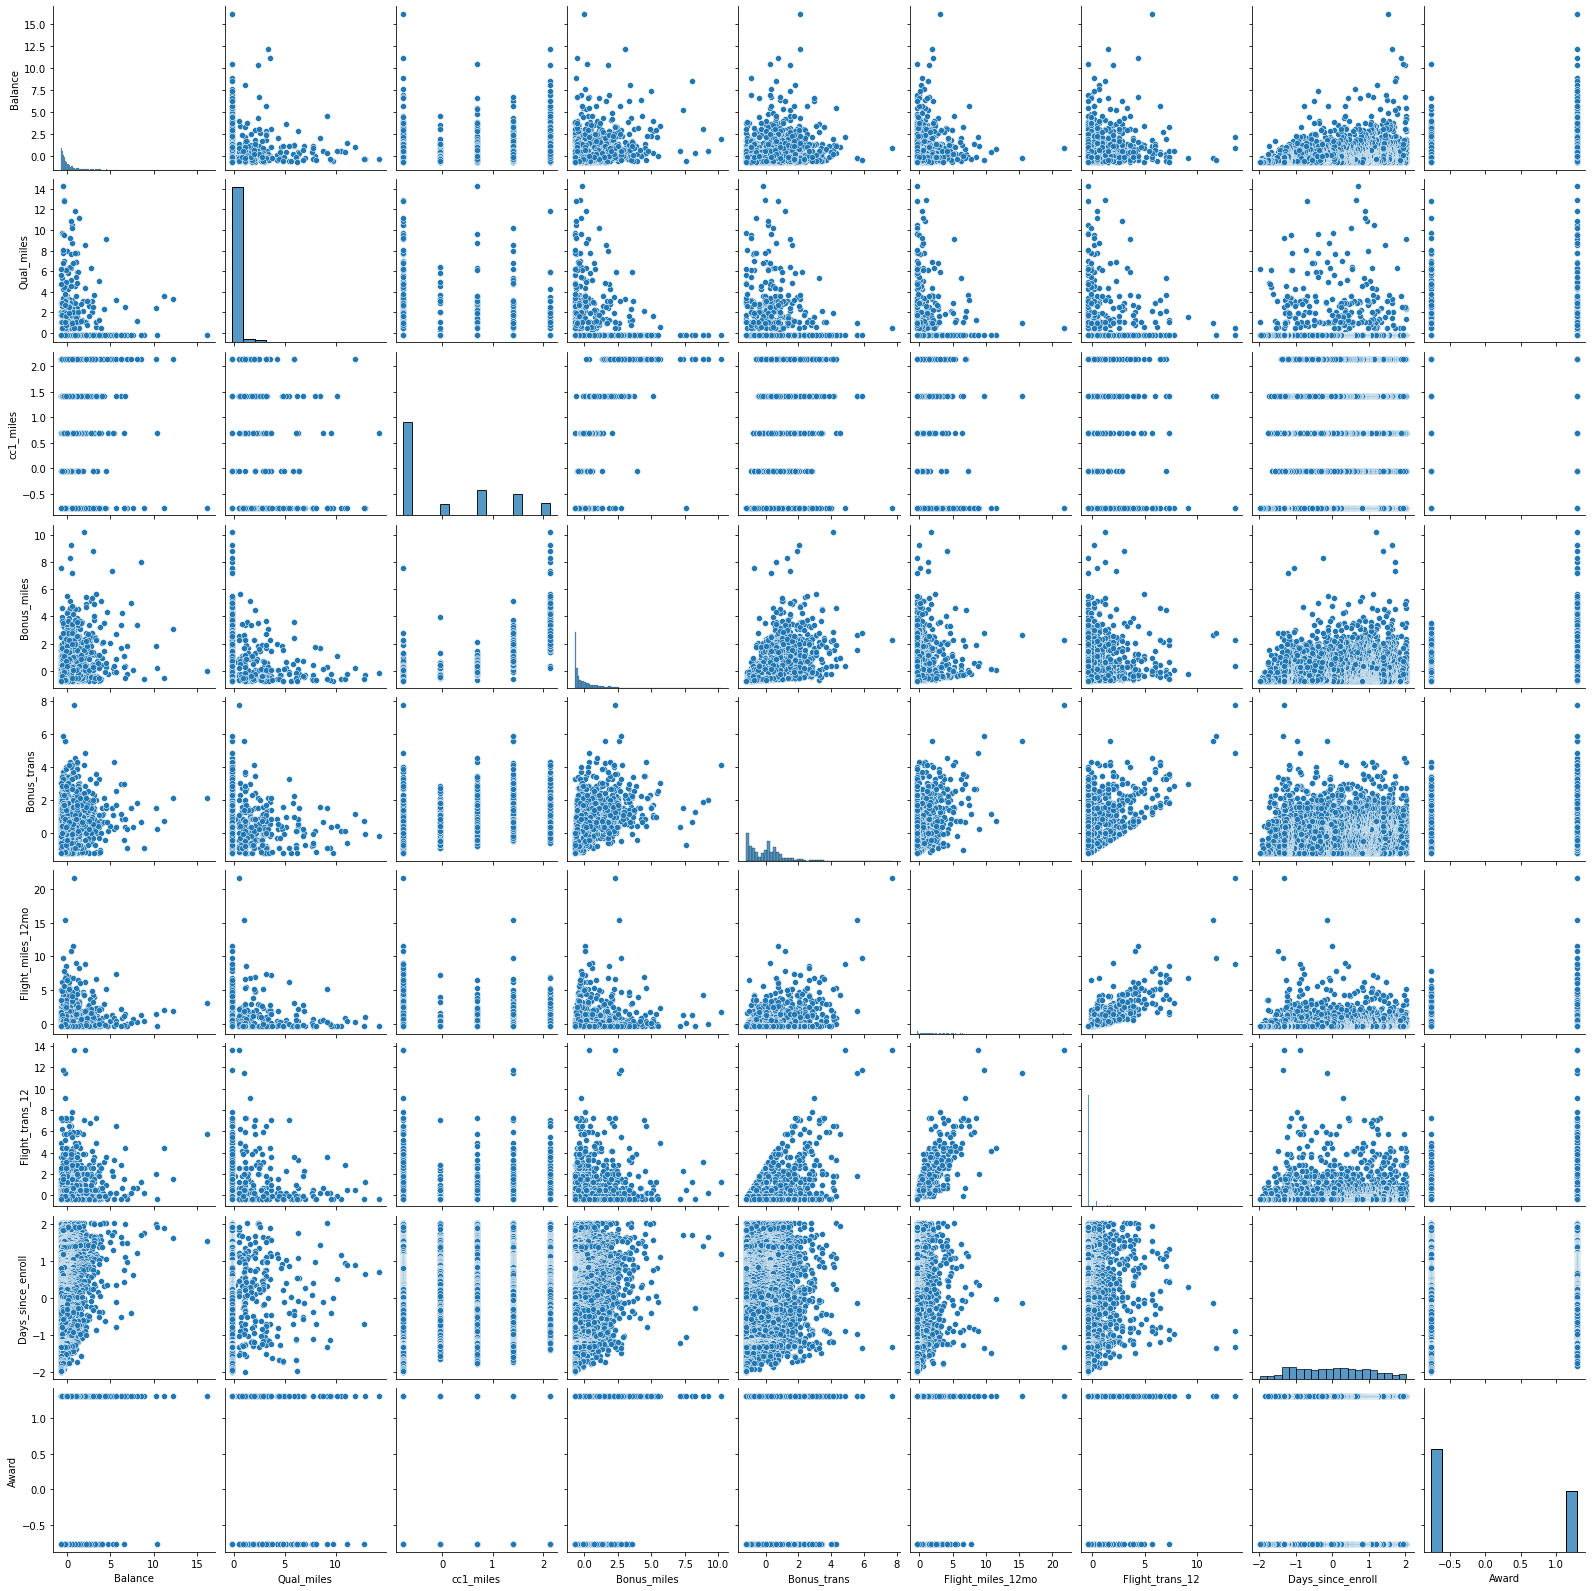

In [ ]:
sns.pairplot(df[scale_columns])
plt.show()

# **DBSCAN algorithm**

In [ ]:
from sklearn.cluster import DBSCAN
df = df1[scale_columns] 
print(df)

       Balance  Qual_miles  ...  Days_since_enroll     Award
0    -0.451141   -0.186299  ...           1.395454 -0.766919
1    -0.539457   -0.186299  ...           1.379957 -0.766919
2    -0.320031   -0.186299  ...           1.411920 -0.766919
3    -0.583799   -0.186299  ...           1.372208 -0.766919
4     0.239678   -0.186299  ...           1.363975  1.303918
...        ...         ...  ...                ...       ...
3994 -0.547079   -0.186299  ...          -1.315120  1.303918
3995 -0.091465   -0.186299  ...          -1.318994  1.303918
3996 -0.000043   -0.186299  ...          -1.315604  1.303918
3997 -0.185607   -0.186299  ...          -1.316088 -0.766919
3998 -0.700508   -0.186299  ...          -1.317541 -0.766919

[3999 rows x 9 columns]


eps= 0.8 & min_samples= 12 cluster count=  0    2161
-1     931
 1     828
 2      53
 4      14
 3      12
dtype: int64


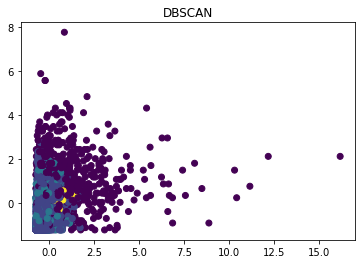

eps= 0.8 & min_samples= 13 cluster count=  0    2156
-1     946
 1     822
 2      51
 4      12
 3      12
dtype: int64


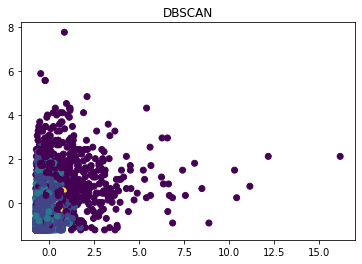

eps= 0.8 & min_samples= 14 cluster count=  0    2148
-1     985
 1     816
 2      50
dtype: int64


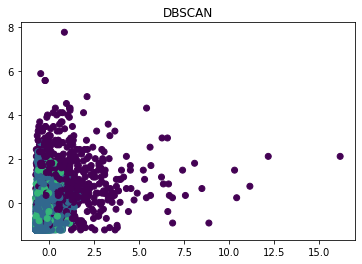

eps= 0.9 & min_samples= 12 cluster count=  0    2258
 1     970
-1     771
dtype: int64


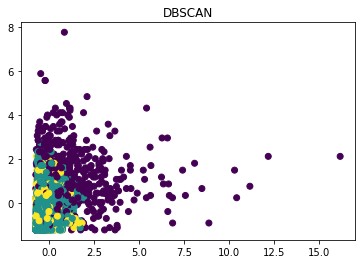

eps= 0.9 & min_samples= 13 cluster count=  0    2250
 1     964
-1     785
dtype: int64


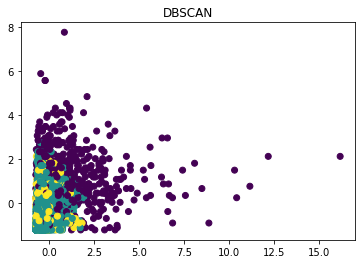

eps= 0.9 & min_samples= 14 cluster count=  0    2245
 1     958
-1     796
dtype: int64


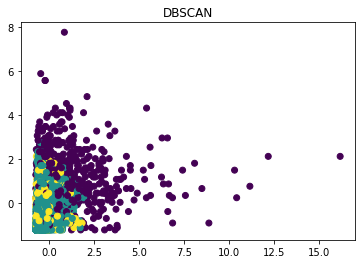

eps= 1.1 & min_samples= 12 cluster count=  0    2329
 1    1087
-1     583
dtype: int64


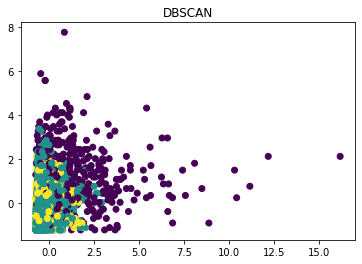

eps= 1.1 & min_samples= 13 cluster count=  0    2327
 1    1080
-1     592
dtype: int64


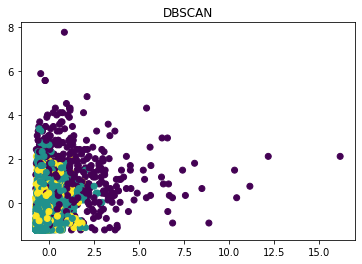

eps= 1.1 & min_samples= 14 cluster count=  0    2319
 1    1069
-1     611
dtype: int64


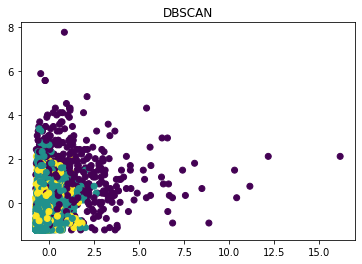

In [ ]:
import matplotlib.pyplot as plt
eps= [0.8,0.9,1.1]
min_samples= [12,13,14]
df_scaled = df1[scale_columns]
for x in eps:
    for y in min_samples:
        dbscan = DBSCAN(eps=x, min_samples=y) 
        y_pred= dbscan.fit_predict(df_scaled)
        dt = pd.DataFrame(y_pred)
        print('eps=',x,'&','min_samples=',y,'cluster count=',dt.value_counts())
        plt.scatter(df['Balance'],df['Bonus_trans'],c=y_pred) 
        plt.title("DBSCAN")
        plt.show()

In [ ]:
eps= 0.8
min_samples= 13
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_scaled['clusterid'] = dbscan.fit_predict(df1[scale_columns])
df_scaled.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,-0.451141,-0.186299,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-1


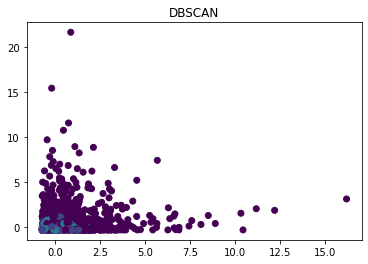

In [ ]:
y_pred=df_scaled['clusterid'] 
plt.scatter(df_scaled['Balance'], df_scaled['Flight_miles_12mo'],c=y_pred) 
plt.title("DBSCAN")
plt.show()

# For eps= 0.8 and min_samples= 12, DBSCAN model is giving us 6 clusters. The Silhouette Score for Cluster 6 is    0.26922044689846153

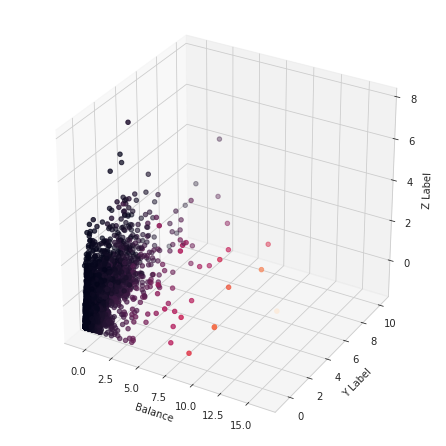

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = df1['Balance']
y = df1['Bonus_miles']
z = df1['Bonus_trans']

ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('Balance')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# **HDBSCAN **

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311906 sha256=96e944b29d3c922de287196fe9add2518b24b607c98779698709ce4359add91d
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusters=[]
outliers=[]
df = df1[scale_columns]
min_sample=[30,40,50,60,20,15]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(df)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])
        print('----------------------------------------------------------------------------------')
    else:
        outliers.append(0)
        print('No. of Outliers 0')

For: 30
no of clusters formed are 5
no of outliers is 1230
----------------------------------------------------------------------------------
For: 40
no of clusters formed are 4
no of outliers is 1356
----------------------------------------------------------------------------------
For: 50
no of clusters formed are 4
no of outliers is 1417
----------------------------------------------------------------------------------
For: 60
no of clusters formed are 4
no of outliers is 1461
----------------------------------------------------------------------------------
For: 20
no of clusters formed are 6
no of outliers is 1044
----------------------------------------------------------------------------------
For: 15
no of clusters formed are 6
no of outliers is 929
----------------------------------------------------------------------------------


# **For min_sample_size: 15, the No. of clusters formed are 6 and No.of outliers are 929. HDBSCAN with this has the least amount of outliers. The Silhouette Score for Cluster 6 is   0.2744212966192579**

In [ ]:
df.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


For: 15
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           2156
-1            946
 1            822
 2             51
 4             12
 3             12
dtype: int64


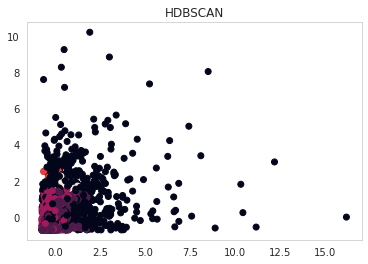

no of outliers is 929
--------------------------------------------------------------------------
For: 10
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           2156
-1            946
 1            822
 2             51
 4             12
 3             12
dtype: int64


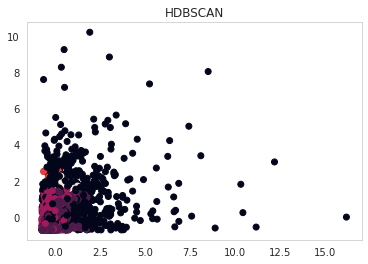

no of outliers is 809
--------------------------------------------------------------------------
For: 12
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           2156
-1            946
 1            822
 2             51
 4             12
 3             12
dtype: int64


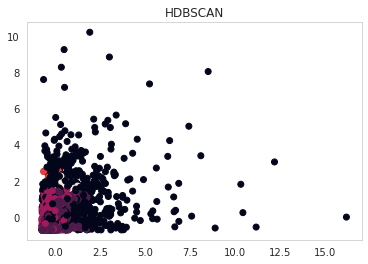

no of outliers is 860
--------------------------------------------------------------------------
For: 13
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           2156
-1            946
 1            822
 2             51
 4             12
 3             12
dtype: int64


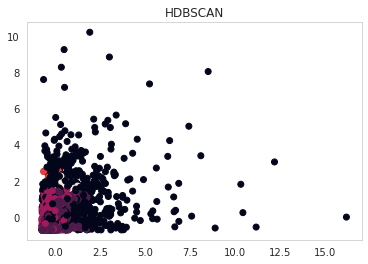

no of outliers is 885
--------------------------------------------------------------------------
For: 5
no of clusters formed are 10
for min_samples= cluster count= clusterid
 0           2156
-1            946
 1            822
 2             51
 4             12
 3             12
dtype: int64


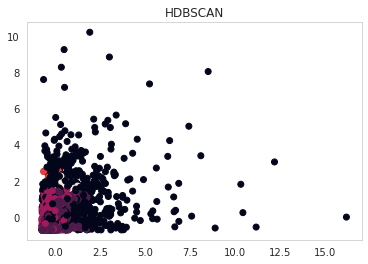

no of outliers is 585
--------------------------------------------------------------------------


In [ ]:
import hdbscan
clusters=[]
outliers=[]
df = df[scale_columns]
min_sample=[15,10,12,13,5]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(df)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    dt = pd.DataFrame(y_pred)
    print('for min_samples=','cluster count=',dt.value_counts())
    plt.scatter(df['Balance'],df['Bonus_miles'],c=y_pred) 
    plt.title("HDBSCAN")
    plt.show()
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])
        print('--------------------------------------------------------------------------')
    else:
        outliers.append(0)
        print('No. of Outliers 0')

In [ ]:
min_cluster_size=6
cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit_predict(df1[scale_columns])

Text(0.5, 1.0, 'HDBSCAN')

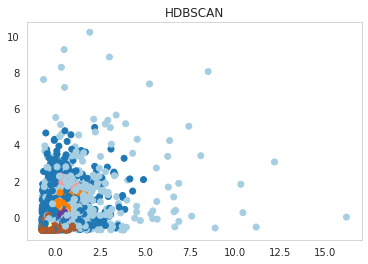

In [ ]:
plt.scatter(df1['Balance'],df1['Bonus_miles'],c=cluster, cmap='Paired')
plt.title("HDBSCAN")

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True) 
clusterer.fit(df1)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=6)

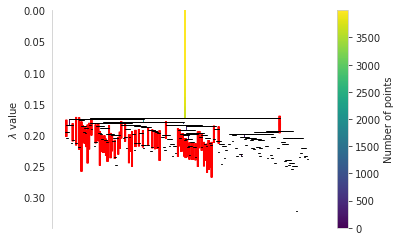

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

array([-1,  0,  1,  2,  3,  4])

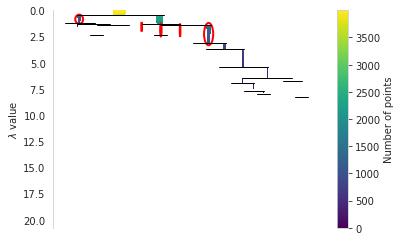

In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=6, min_samples = 15)
labels = hdbscan.fit_predict(df)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

# **With Reduction Technique**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#PCA
#Feature Reduction
components=3
values = PCA().fit_transform(df1[scale_columns] )[:, :components]
print(values)



[[-1.4639834  -0.05889902  0.91308776]
 [-1.4479663  -0.05531974  0.85281864]
 [-1.20737155 -0.12910049  0.86989236]
 ...
 [ 0.17595877 -0.61724289 -0.69650574]
 [-1.69295279  0.76794969 -0.47590259]
 [-2.10968778  0.44809714 -0.54688171]]


For n_clusters = 2 The average silhouette_score is : 0.4619540223201434
For n_clusters = 3 The average silhouette_score is : 0.46670689928316483
For n_clusters = 4 The average silhouette_score is : 0.4788892996133697
For n_clusters = 5 The average silhouette_score is : 0.3704396057234489
For n_clusters = 6 The average silhouette_score is : 0.4147795499022503
For n_clusters = 7 The average silhouette_score is : 0.33182155241891986
For n_clusters = 8 The average silhouette_score is : 0.3355477934881762
For n_clusters = 9 The average silhouette_score is : 0.33608888851658847
For n_clusters = 10 The average silhouette_score is : 0.32857483522784675
For n_clusters = 12 The average silhouette_score is : 0.3074078975540017


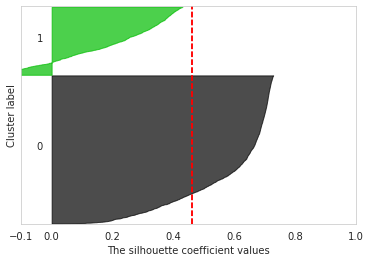

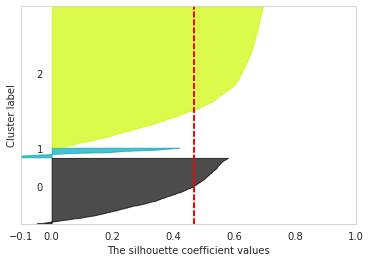

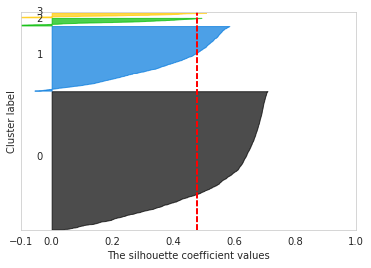

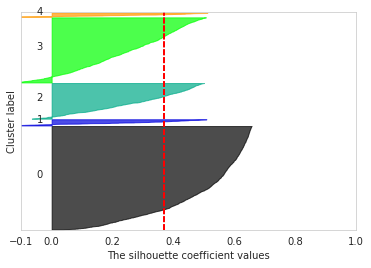

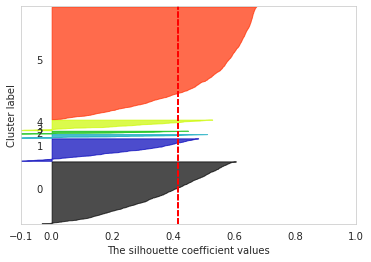

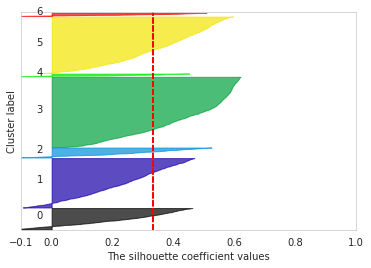

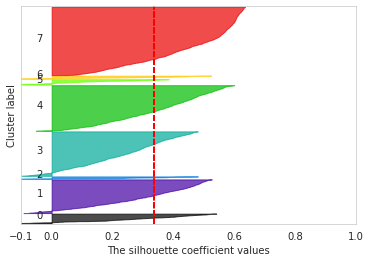

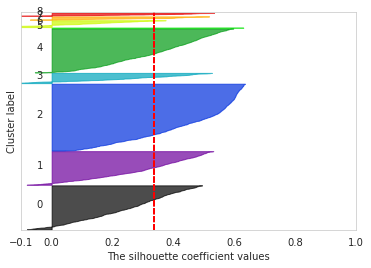

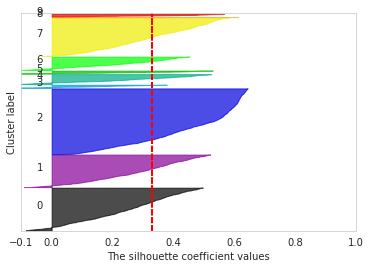

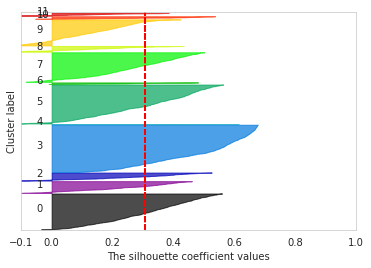

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,12]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
  fig, ax1 = plt.subplots(1, 1)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(values) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(values)
  silhouette_avg = silhouette_score(values, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(values, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
df = values
print(df)


[[-1.4639834  -0.05889902  0.91308776]
 [-1.4479663  -0.05531974  0.85281864]
 [-1.20737155 -0.12910049  0.86989236]
 ...
 [ 0.17595877 -0.61724289 -0.69650574]
 [-1.69295279  0.76794969 -0.47590259]
 [-2.10968778  0.44809714 -0.54688171]]


eps= 0.7 & min_samples= 10 cluster count=  0    3719
-1     280
dtype: int64


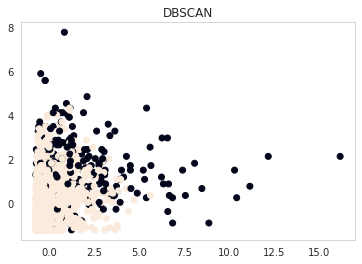

eps= 0.7 & min_samples= 11 cluster count=  0    3710
-1     289
dtype: int64


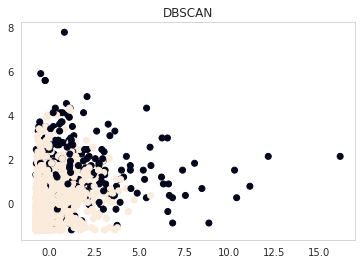

eps= 0.7 & min_samples= 12 cluster count=  0    3691
-1     298
 1      10
dtype: int64


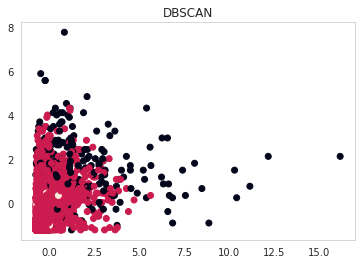

eps= 0.9 & min_samples= 10 cluster count=  0    3795
-1     204
dtype: int64


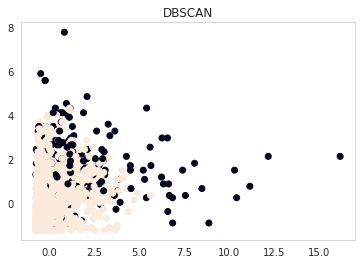

eps= 0.9 & min_samples= 11 cluster count=  0    3793
-1     206
dtype: int64


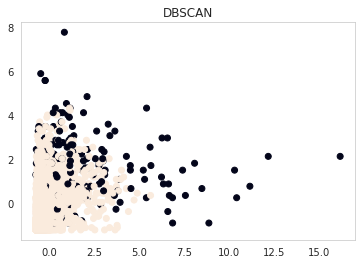

eps= 0.9 & min_samples= 12 cluster count=  0    3788
-1     211
dtype: int64


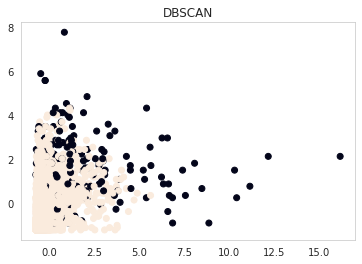

eps= 1.1 & min_samples= 10 cluster count=  0    3851
-1     148
dtype: int64


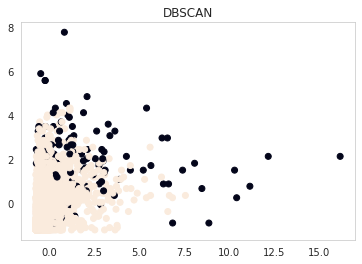

eps= 1.1 & min_samples= 11 cluster count=  0    3847
-1     152
dtype: int64


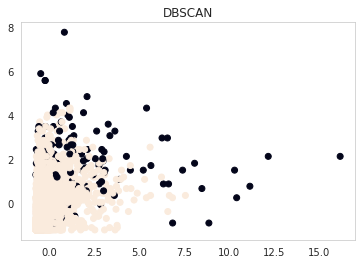

eps= 1.1 & min_samples= 12 cluster count=  0    3838
-1     161
dtype: int64


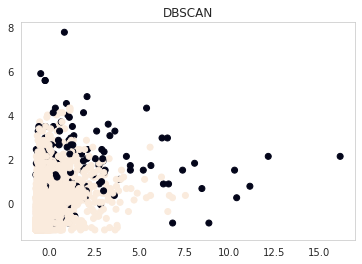

eps= 1.2 & min_samples= 10 cluster count=  0    3886
-1     113
dtype: int64


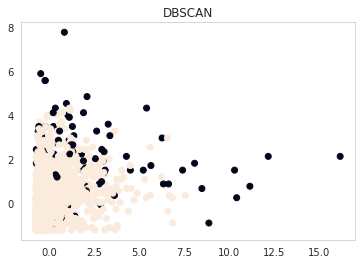

eps= 1.2 & min_samples= 11 cluster count=  0    3878
-1     121
dtype: int64


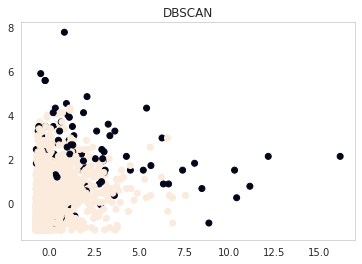

eps= 1.2 & min_samples= 12 cluster count=  0    3877
-1     122
dtype: int64


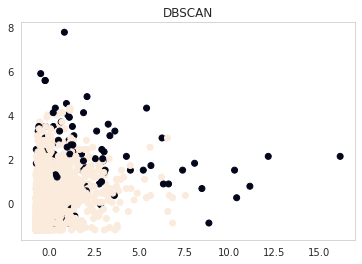

In [ ]:
import matplotlib.pyplot as plt
eps= [0.7,0.9,1.1,1.2]
min_samples= [10,11,12]

for x in eps:
    for y in min_samples:
        dbscan = DBSCAN(eps=x, min_samples=y) 
        y_pred= dbscan.fit_predict(values)
        dt = pd.DataFrame(y_pred)
        print('eps=',x,'&','min_samples=',y,'cluster count=',dt.value_counts())
        plt.scatter(df1['Balance'],df1['Bonus_trans'],c=y_pred) 
        plt.title("DBSCAN")
        plt.show()

In [ ]:
eps= 0.7
min_samples= 12
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df1['clusterid'] = dbscan.fit_predict(values)
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0


# For eps= 0.7 and min_samples= 12, DBSCAN model is giving us 3 clusters. The Silhouette Score for Cluster 3 is    0.46670689928316483

```
# This is formatted as code
```



Text(0.5, 1.0, 'DBSCAN')

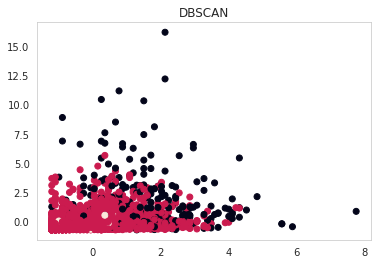

In [ ]:
y_pred=df1['clusterid'] 
plt.scatter(df1['Bonus_trans'], df1['Balance'],c=y_pred) 
plt.title("DBSCAN")

# **HDBSCAN**

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

For: 15
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


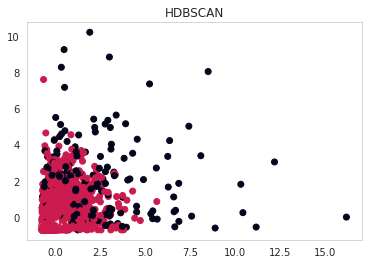

no of outliers is 929
--------------------------------------------------------------------------
For: 10
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


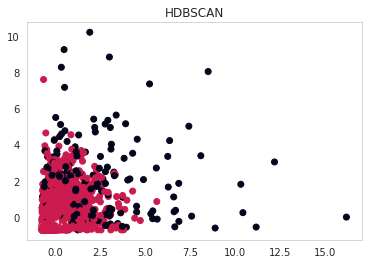

no of outliers is 809
--------------------------------------------------------------------------
For: 12
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


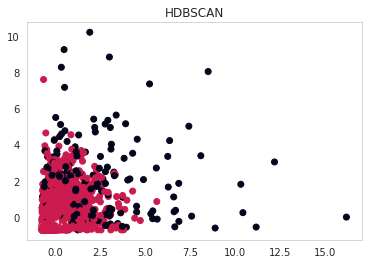

no of outliers is 860
--------------------------------------------------------------------------
For: 13
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


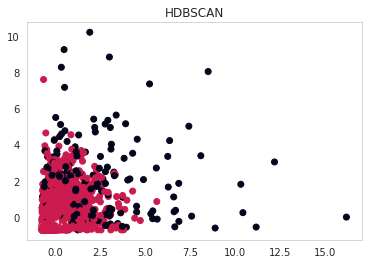

no of outliers is 885
--------------------------------------------------------------------------
For: 5
no of clusters formed are 10
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


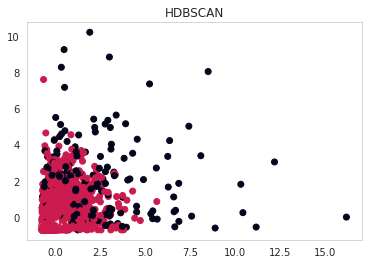

no of outliers is 585
--------------------------------------------------------------------------


In [ ]:
import hdbscan
clusters=[]
outliers=[]
df = df1[scale_columns]
min_sample=[15,10,12,13,5]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(df)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    dt = pd.DataFrame(y_pred)
    print('for min_samples=','cluster count=',dt.value_counts())
    plt.scatter(df['Balance'],df['Bonus_miles'],c=y_pred) 
    plt.title("HDBSCAN")
    plt.show()
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])
        print('--------------------------------------------------------------------------')
    else:
        outliers.append(0)
        print('No. of Outliers 0')

In [ ]:
clusters=[]
outliers=[]
df = df1[scale_columns]
min_sample=[30,40,50,60,20,15]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(values)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])
        print('----------------------------------------------------------------------------------')
    else:
        outliers.append(0)
        print('No. of Outliers 0')

For: 30
no of clusters formed are 4
no of outliers is 2059
----------------------------------------------------------------------------------
For: 40
no of clusters formed are 4
no of outliers is 2129
----------------------------------------------------------------------------------
For: 50
no of clusters formed are 4
no of outliers is 2111
----------------------------------------------------------------------------------
For: 60
no of clusters formed are 3
no of outliers is 1740
----------------------------------------------------------------------------------
For: 20
no of clusters formed are 4
no of outliers is 2033
----------------------------------------------------------------------------------
For: 15
no of clusters formed are 6
no of outliers is 2159
----------------------------------------------------------------------------------


# **For min_sample_size: 60, the No. of clusters formed are 3 and No.of outliers are 1740. HDBSCAN with this has the least amount of outliers. The Silhouette Score for Cluster 3 is  0.46670689928316483

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True) 
clusterer.fit(df1)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

In [ ]:
clusterer

For: 15
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


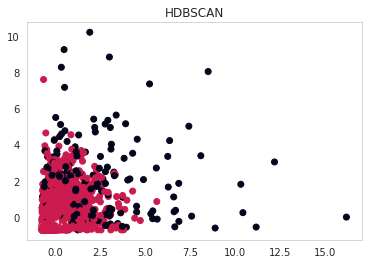

no of outliers is 2159
--------------------------------------------------------------------------
For: 10
no of clusters formed are 8
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


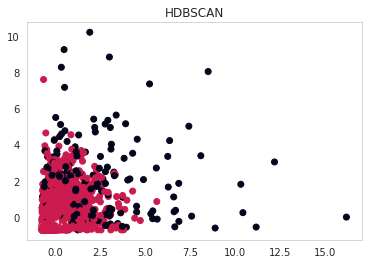

no of outliers is 2052
--------------------------------------------------------------------------
For: 12
no of clusters formed are 8
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


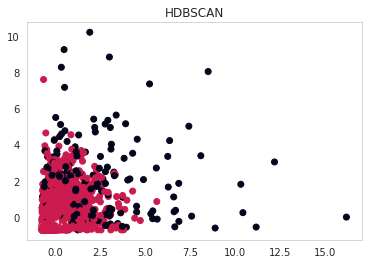

no of outliers is 2120
--------------------------------------------------------------------------
For: 13
no of clusters formed are 6
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


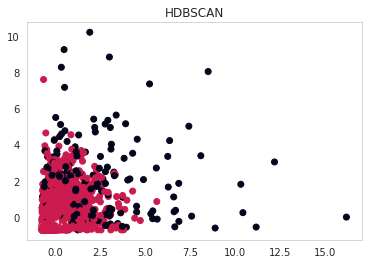

no of outliers is 1869
--------------------------------------------------------------------------
For: 5
no of clusters formed are 79
for min_samples= cluster count= clusterid
 0           3691
-1            298
 1             10
dtype: int64


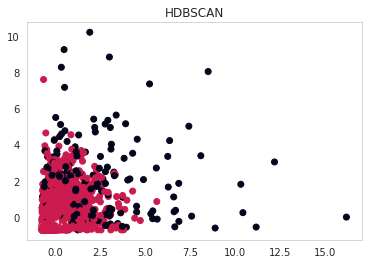

no of outliers is 2563
--------------------------------------------------------------------------


In [ ]:
import hdbscan
clusters=[]
outliers=[]
df = df[scale_columns]
min_sample=[15,10,12,13,5]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(values)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    dt = pd.DataFrame(y_pred)
    print('for min_samples=','cluster count=',dt.value_counts())
    plt.scatter(df['Balance'],df['Bonus_miles'],c=y_pred) 
    plt.title("HDBSCAN")
    plt.show()
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])
        print('--------------------------------------------------------------------------')
    else:
        outliers.append(0)
        print('No. of Outliers 0')

In [ ]:
min_cluster_size=3
cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit_predict(df1[scale_columns])

Text(0.5, 1.0, 'HDBSCAN')

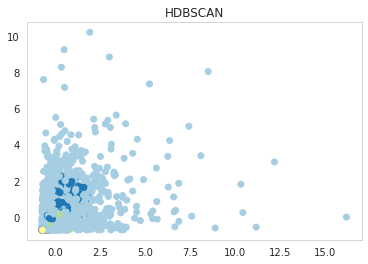

In [ ]:
plt.scatter(df1['Balance'],df1['Bonus_miles'],c=cluster, cmap='Paired')
plt.title("HDBSCAN")

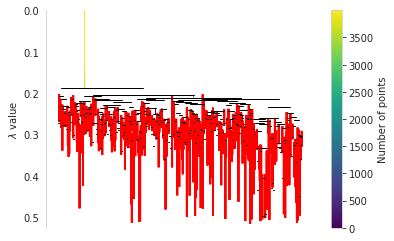

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

array([-1,  0,  1,  2])

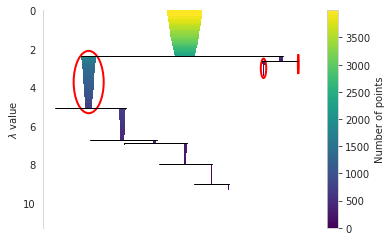

In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=3, min_samples = 60)
labels = hdbscan.fit_predict(values)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

# **Task 6**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# **Logistic Regression model**

In [ ]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
X=df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']]

In [ ]:
Y=df['Award']

In [ ]:
#Train_test_Split 
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
Y_test

3190    0
1473    0
3068    0
1044    1
3794    0
       ..
3571    0
2486    1
643     0
299     0
1160    1
Name: Award, Length: 800, dtype: int64

In [ ]:
logistic_regression=LogisticRegression()

In [ ]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the model is %:', accuracy_score(Y_test, y_pred)*100)

accuracy of the model is %: 72.875


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(cnf_matrix)

[[445  77]
 [140 138]]


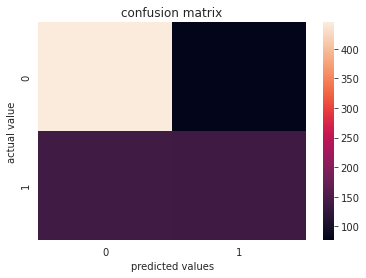

In [ ]:
sns.heatmap(cnf_matrix)
plt.title("confusion matrix")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.show()

# **Gaussian Naive Bayes Model**

In [ ]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y1_pred=gnb.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model's accuracy in (%): ", metrics.accuracy_score(Y_test,y1_pred)*100)

Gaussian Naive Bayes model's accuracy in (%):  72.125


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y1_pred)
print(cnf_matrix)

[[480  42]
 [181  97]]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall',recall_score(Y_test,y1_pred))
print('f1_score',f1_score(Y_test,y1_pred))
print('accuracy_score',accuracy_score(Y_test,y1_pred))
print('recall',recall_score(Y_test,y1_pred))

recall 0.3489208633093525
f1_score 0.46522781774580335
accuracy_score 0.72125
recall 0.3489208633093525


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y1_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.634230546597205

In [ ]:
lr_probs=logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1=lr_probs[:,1]
lr_1

[[0.62117155 0.37882845]
 [0.59233919 0.40766081]
 [0.62043263 0.37956737]
 ...
 [0.69904834 0.30095166]
 [0.75421672 0.24578328]
 [0.65348567 0.34651433]]


array([0.37882845, 0.40766081, 0.37956737, 0.59229247, 0.36852904,
       0.52539024, 0.53020552, 0.87998229, 0.42375635, 0.46120696,
       0.30217568, 0.67896809, 0.31500874, 0.40683034, 0.24319896,
       0.25982102, 0.44219242, 0.26197703, 0.53226877, 0.32502473,
       0.52465977, 0.3201509 , 0.71240222, 0.22353452, 0.35909242,
       0.300371  , 0.5450954 , 0.35884272, 0.40022329, 0.31849228,
       0.33211758, 0.23335663, 0.34224069, 0.45342913, 0.48863545,
       0.44851611, 0.20949566, 0.60146664, 0.33256198, 0.59021336,
       0.36685454, 0.32368955, 0.26763013, 0.82045386, 0.22256122,
       0.22655465, 0.44099154, 0.32282035, 0.78955856, 0.14331336,
       0.23660406, 0.36413194, 0.46377026, 0.46179914, 0.32444809,
       0.30663802, 0.29353178, 0.54646999, 0.28517945, 0.34451181,
       0.4662594 , 0.68489625, 0.7983823 , 0.18970467, 0.29395899,
       0.46859662, 0.48261236, 0.53735119, 0.27103528, 0.40306157,
       0.73694351, 0.85680484, 0.35915386, 0.28848983, 0.38395

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test,lr_1)
score

0.7084883817084264

# **K-Neighbor Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y2_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y2_pred)*100
acc

72.5

In [ ]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(Y_test,y2_pred)
cnf_matrix

array([[434,  88],
       [132, 146]])

# **Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,Y_train)
y3_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y3_pred)*100)

Accuracy: 74.75


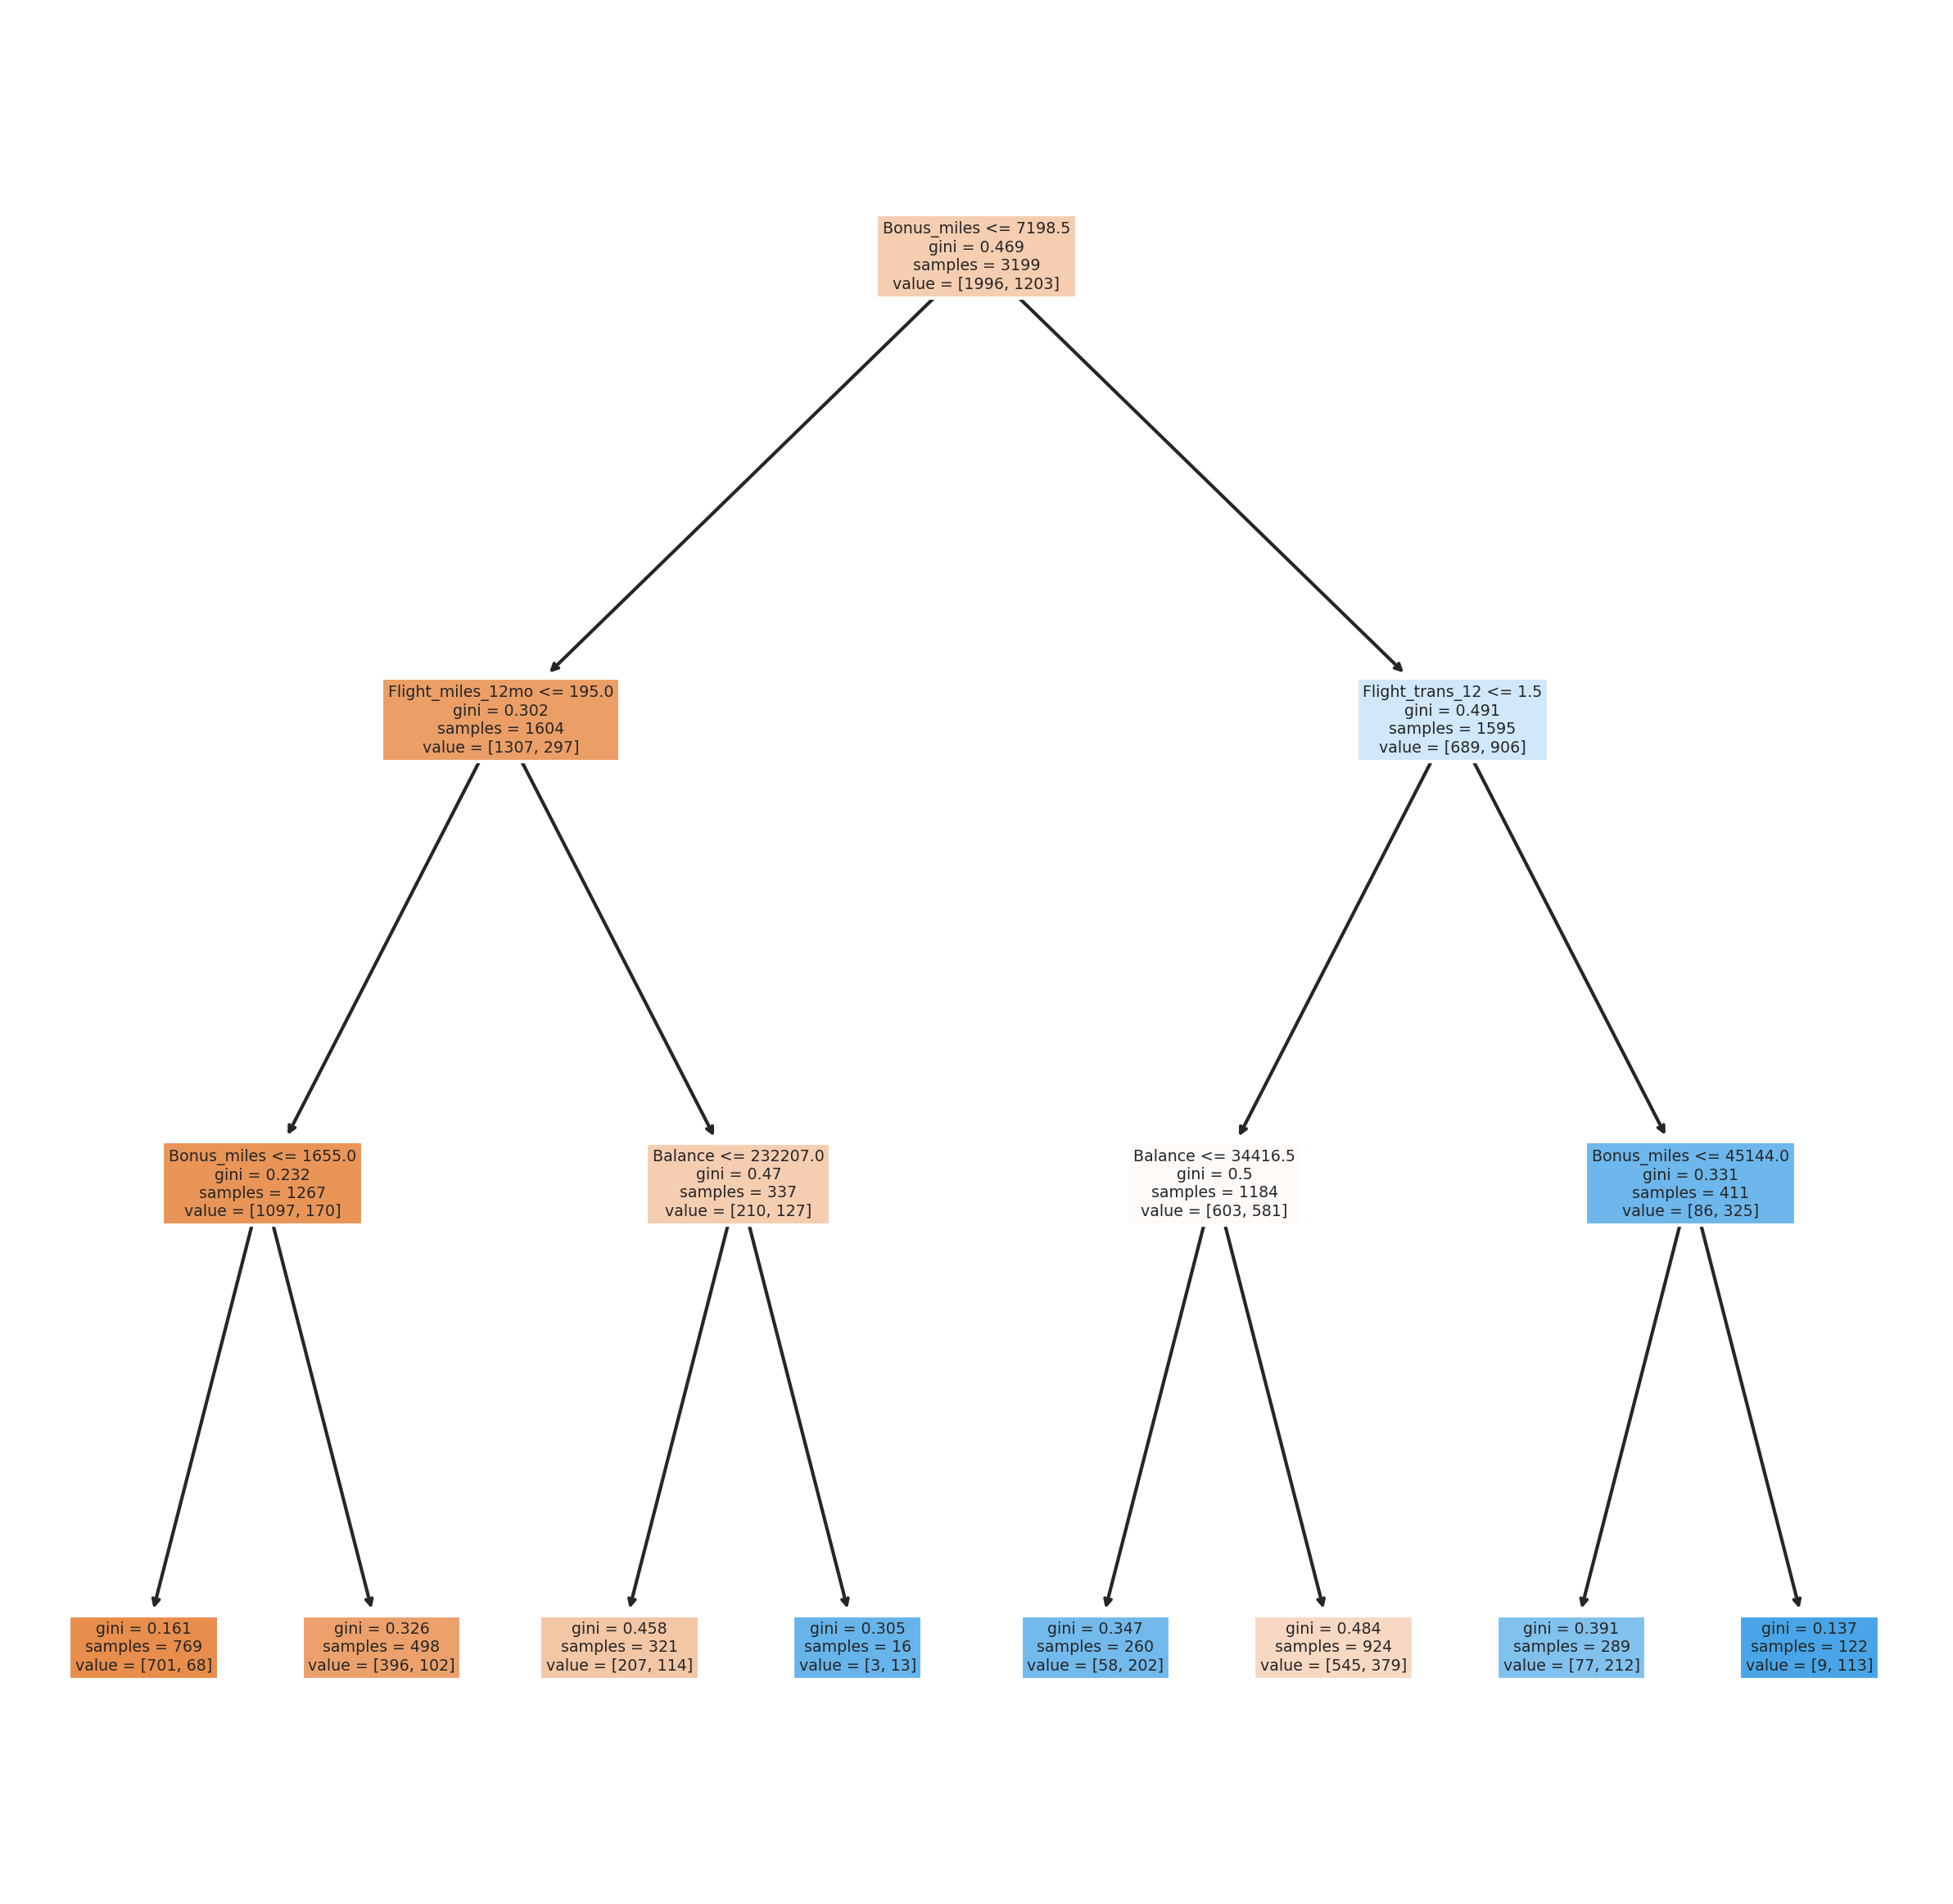

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
feature_cols = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(clf,feature_names = feature_cols, filled = True);

fig.savefig('Airline_Tree.png')

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y3_pred)
print(cnf_matrix)

[[476  46]
 [156 122]]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall',recall_score(Y_test,y3_pred))
print('f1_score',f1_score(Y_test,y3_pred))
print('accuracy_score',accuracy_score(Y_test,y3_pred))
print('recall',recall_score(Y_test,y3_pred))

recall 0.43884892086330934
f1_score 0.547085201793722
accuracy_score 0.7475
recall 0.43884892086330934


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y3_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.6753631577496624

In [ ]:
lr_probs=logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1=lr_probs[:,1]
lr_1

[[0.62117155 0.37882845]
 [0.59233919 0.40766081]
 [0.62043263 0.37956737]
 ...
 [0.69904834 0.30095166]
 [0.75421672 0.24578328]
 [0.65348567 0.34651433]]


array([0.37882845, 0.40766081, 0.37956737, 0.59229247, 0.36852904,
       0.52539024, 0.53020552, 0.87998229, 0.42375635, 0.46120696,
       0.30217568, 0.67896809, 0.31500874, 0.40683034, 0.24319896,
       0.25982102, 0.44219242, 0.26197703, 0.53226877, 0.32502473,
       0.52465977, 0.3201509 , 0.71240222, 0.22353452, 0.35909242,
       0.300371  , 0.5450954 , 0.35884272, 0.40022329, 0.31849228,
       0.33211758, 0.23335663, 0.34224069, 0.45342913, 0.48863545,
       0.44851611, 0.20949566, 0.60146664, 0.33256198, 0.59021336,
       0.36685454, 0.32368955, 0.26763013, 0.82045386, 0.22256122,
       0.22655465, 0.44099154, 0.32282035, 0.78955856, 0.14331336,
       0.23660406, 0.36413194, 0.46377026, 0.46179914, 0.32444809,
       0.30663802, 0.29353178, 0.54646999, 0.28517945, 0.34451181,
       0.4662594 , 0.68489625, 0.7983823 , 0.18970467, 0.29395899,
       0.46859662, 0.48261236, 0.53735119, 0.27103528, 0.40306157,
       0.73694351, 0.85680484, 0.35915386, 0.28848983, 0.38395

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test,lr_1)
score

0.7084883817084264

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train,Y_train)
y4_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y4_pred)*100)

Accuracy: 79.0


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y4_pred)
print(cnf_matrix)

[[459  63]
 [105 173]]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall',recall_score(Y_test,y4_pred))
print('f1_score',f1_score(Y_test,y4_pred))
print('accuracy_score',accuracy_score(Y_test,y4_pred))
print('recall',recall_score(Y_test,y4_pred))

recall 0.6223021582733813
f1_score 0.6731517509727626
accuracy_score 0.79
recall 0.6223021582733813


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y4_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.7508062515504839

In [ ]:
lr_probs=logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1=lr_probs[:,1]
lr_1

[[0.62117155 0.37882845]
 [0.59233919 0.40766081]
 [0.62043263 0.37956737]
 ...
 [0.69904834 0.30095166]
 [0.75421672 0.24578328]
 [0.65348567 0.34651433]]


array([0.37882845, 0.40766081, 0.37956737, 0.59229247, 0.36852904,
       0.52539024, 0.53020552, 0.87998229, 0.42375635, 0.46120696,
       0.30217568, 0.67896809, 0.31500874, 0.40683034, 0.24319896,
       0.25982102, 0.44219242, 0.26197703, 0.53226877, 0.32502473,
       0.52465977, 0.3201509 , 0.71240222, 0.22353452, 0.35909242,
       0.300371  , 0.5450954 , 0.35884272, 0.40022329, 0.31849228,
       0.33211758, 0.23335663, 0.34224069, 0.45342913, 0.48863545,
       0.44851611, 0.20949566, 0.60146664, 0.33256198, 0.59021336,
       0.36685454, 0.32368955, 0.26763013, 0.82045386, 0.22256122,
       0.22655465, 0.44099154, 0.32282035, 0.78955856, 0.14331336,
       0.23660406, 0.36413194, 0.46377026, 0.46179914, 0.32444809,
       0.30663802, 0.29353178, 0.54646999, 0.28517945, 0.34451181,
       0.4662594 , 0.68489625, 0.7983823 , 0.18970467, 0.29395899,
       0.46859662, 0.48261236, 0.53735119, 0.27103528, 0.40306157,
       0.73694351, 0.85680484, 0.35915386, 0.28848983, 0.38395

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test,lr_1)
score

0.7084883817084264

# **Adaptive Boosting Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model = model.fit(X_train,Y_train)
y5_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y5_pred)*100)

Accuracy: 76.625


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y5_pred)
print(cnf_matrix)

[[445  77]
 [110 168]]


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y5_pred)
matrix=metrics.classification_report(Y_test, y5_pred)
print(cnf_matrix)
print(matrix)

[[445  77]
 [110 168]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       522
           1       0.69      0.60      0.64       278

    accuracy                           0.77       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.76      0.77      0.76       800



In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall',recall_score(Y_test,y5_pred))
print('f1_score',f1_score(Y_test,y5_pred))
print('accuracy_score',accuracy_score(Y_test,y5_pred))
print('recall',recall_score(Y_test,y5_pred))

recall 0.60431654676259
f1_score 0.6424474187380497
accuracy_score 0.76625
recall 0.60431654676259


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y5_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.7284034841092643

In [ ]:
lr_probs=logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1=lr_probs[:,1]
lr_1

[[0.62117155 0.37882845]
 [0.59233919 0.40766081]
 [0.62043263 0.37956737]
 ...
 [0.69904834 0.30095166]
 [0.75421672 0.24578328]
 [0.65348567 0.34651433]]


array([0.37882845, 0.40766081, 0.37956737, 0.59229247, 0.36852904,
       0.52539024, 0.53020552, 0.87998229, 0.42375635, 0.46120696,
       0.30217568, 0.67896809, 0.31500874, 0.40683034, 0.24319896,
       0.25982102, 0.44219242, 0.26197703, 0.53226877, 0.32502473,
       0.52465977, 0.3201509 , 0.71240222, 0.22353452, 0.35909242,
       0.300371  , 0.5450954 , 0.35884272, 0.40022329, 0.31849228,
       0.33211758, 0.23335663, 0.34224069, 0.45342913, 0.48863545,
       0.44851611, 0.20949566, 0.60146664, 0.33256198, 0.59021336,
       0.36685454, 0.32368955, 0.26763013, 0.82045386, 0.22256122,
       0.22655465, 0.44099154, 0.32282035, 0.78955856, 0.14331336,
       0.23660406, 0.36413194, 0.46377026, 0.46179914, 0.32444809,
       0.30663802, 0.29353178, 0.54646999, 0.28517945, 0.34451181,
       0.4662594 , 0.68489625, 0.7983823 , 0.18970467, 0.29395899,
       0.46859662, 0.48261236, 0.53735119, 0.27103528, 0.40306157,
       0.73694351, 0.85680484, 0.35915386, 0.28848983, 0.38395

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test,lr_1)
score

0.7084883817084264

# **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn=KNeighborsClassifier()
dtr= DecisionTreeClassifier()
ada= AdaBoostClassifier()
rfr=RandomForestClassifier()
lgr= LogisticRegression() 
level0=[('knn',knn),('dtr',dtr),('ada',ada),('lgr',lgr)]

In [ ]:
model0 = StackingClassifier(estimators=level0, final_estimator=RandomForestClassifier())

In [ ]:
model0.fit(X_train,Y_train)


StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dtr', DecisionTreeClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('lgr', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [ ]:
y7_pred =model0.predict(X_test)
y7_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
print('accuracy of the model is %:', accuracy_score(Y_test, y7_pred)*100)

accuracy of the model is %: 73.75


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y7_pred)
print(cnf_matrix)

[[424  98]
 [112 166]]


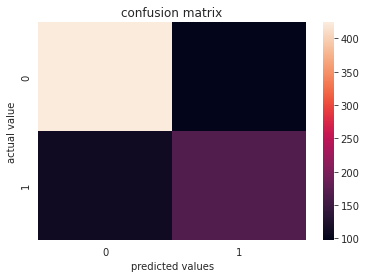

In [ ]:
sns.heatmap(cnf_matrix)
plt.title("confusion matrix")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y7_pred)
matrix=metrics.classification_report(Y_test, y7_pred)
print(cnf_matrix)
print(matrix)

[[424  98]
 [112 166]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       522
           1       0.63      0.60      0.61       278

    accuracy                           0.74       800
   macro avg       0.71      0.70      0.71       800
weighted avg       0.73      0.74      0.74       800



In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall',recall_score(Y_test,y7_pred))
print('f1_score',f1_score(Y_test,y7_pred))
print('accuracy_score',accuracy_score(Y_test,y7_pred))
print('recall',recall_score(Y_test,y7_pred))

recall 0.5971223021582733
f1_score 0.6125461254612545
accuracy_score 0.7375
recall 0.5971223021582733


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,y7_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.7046914192783703

In [ ]:
lr_probs=logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1=lr_probs[:,1]
lr_1

[[0.62117155 0.37882845]
 [0.59233919 0.40766081]
 [0.62043263 0.37956737]
 ...
 [0.69904834 0.30095166]
 [0.75421672 0.24578328]
 [0.65348567 0.34651433]]


array([0.37882845, 0.40766081, 0.37956737, 0.59229247, 0.36852904,
       0.52539024, 0.53020552, 0.87998229, 0.42375635, 0.46120696,
       0.30217568, 0.67896809, 0.31500874, 0.40683034, 0.24319896,
       0.25982102, 0.44219242, 0.26197703, 0.53226877, 0.32502473,
       0.52465977, 0.3201509 , 0.71240222, 0.22353452, 0.35909242,
       0.300371  , 0.5450954 , 0.35884272, 0.40022329, 0.31849228,
       0.33211758, 0.23335663, 0.34224069, 0.45342913, 0.48863545,
       0.44851611, 0.20949566, 0.60146664, 0.33256198, 0.59021336,
       0.36685454, 0.32368955, 0.26763013, 0.82045386, 0.22256122,
       0.22655465, 0.44099154, 0.32282035, 0.78955856, 0.14331336,
       0.23660406, 0.36413194, 0.46377026, 0.46179914, 0.32444809,
       0.30663802, 0.29353178, 0.54646999, 0.28517945, 0.34451181,
       0.4662594 , 0.68489625, 0.7983823 , 0.18970467, 0.29395899,
       0.46859662, 0.48261236, 0.53735119, 0.27103528, 0.40306157,
       0.73694351, 0.85680484, 0.35915386, 0.28848983, 0.38395

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test,lr_1)
score

0.7084883817084264

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.708


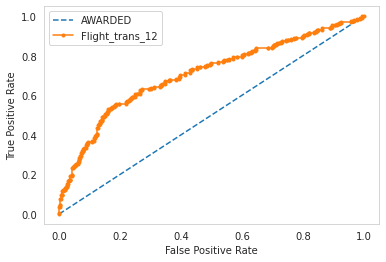

In [ ]:
# keep probabilities for the positive outcome only
lr_probs 
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AWARDED')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Flight_trans_12')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [1 for _ in range(len(Y_test))]

In [ ]:
# keep probabilities for the positive outcome only
lr_probs 
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='NOT AWARDED')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: ignored